# Use Case Business Analytics E-commerce company 

A Portuguese e-commerce company that sells electronic devices wants to extract business knowledge from data representing sales and product deliveries. Especially important is to develop models to:  
1. Predict if the product reach on time and also 
2. To predict next week total costs using the total costs of the previous two weeks. 

# CRISP-DM Methodology 

In [1]:
#importar as principais livrarias 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Modelo de Vendas 

In [2]:
#extrair os dados
df = pd.read_csv('base_dados.csv')

In [3]:
df

,Unnamed: 0,id,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,0,1,F,Ship,3,2,234,3,medium,M,39,2099,2,1,0
1,1,2,D,Ship,3,4,122,3,high,F,15,1354,2,1,0
2,2,3,F,Ship,3,3,135,3,low,M,8,1074,2,1,0
3,3,4,A,Ship,3,5,103,3,low,M,3,1403,2,1,0
4,4,5,B,Ship,3,5,257,3,medium,F,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9639,9640,A,Flight,4,1,204,3,medium,M,3,4310,6,27,1
9640,9640,9641,B,Flight,3,1,199,3,high,M,3,5127,6,27,1
9641,9641,9642,C,Flight,3,4,216,3,low,F,3,5149,6,27,1
9642,9642,9643,F,Flight,4,3,183,3,low,F,6,5712,6,27,0


Primeiro vamos eliminar a coluna id e Unnamed: 0 porque são redundantes.  

In [4]:
# Let's do a copy in order to preseve the df dataset in memory and saved from inplace operations
X = df.copy(deep=True)

In [5]:
# Let's remove passenger id, and consider be moved -1
X = X.drop(columns=['Unnamed: 0', 'id'])

In [6]:
X.describe()

,number_customer_calls,customer_rating,product_cost,number_prior_purchases,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
count,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000,9644.000000
mean,4.072999,2.991186,210.433534,3.547491,13.387495,3663.537536,4.508917,13.903049,0.401701
std,1.153949,1.412315,48.370811,1.527488,16.210744,1621.741224,1.331976,7.304806,0.490267
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1872.000000,4.000000,7.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4172.000000,5.000000,13.000000,0.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5062.000000,6.000000,20.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,6.000000,27.000000,1.000000


A média dos custos é de 210,433534. O mínimo é 96.0 e o máximo é 310.0. 

In [7]:
# If we analyse some of the features with the predict label 
X[['warehouse', 'product_cost']].groupby(['warehouse'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

,warehouse,product_cost
1,B,212.332296
2,C,211.382078
3,D,211.169154
4,F,209.295801
0,A,209.126322


A média dos custos é semelhante em todos os armazéns. 

In [8]:
X[['shipment', 'product_cost']].groupby(['shipment'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

,shipment,product_cost
2,Ship,210.531169
1,Road,210.530090
0,Flight,209.925950


A média dos custos é semelhante para todos os meios de transporte. 

In [9]:
data_1 = X[['number_customer_calls', 'product_cost']].groupby(['number_customer_calls'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

Por norma quem acompanha mais a encomenda tem uma média de preço de custo mais elevada. 

Text(0, 0.5, 'mean product_cost')

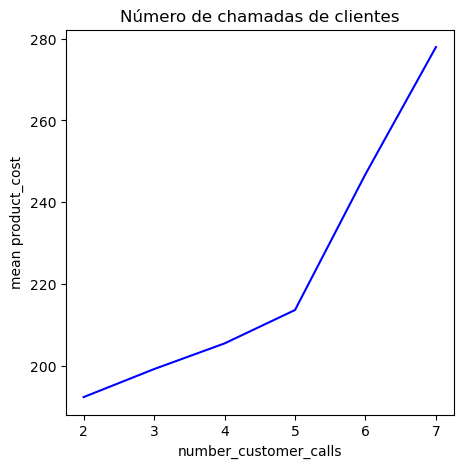

In [10]:
plt.figure(figsize =(5, 5))

a = sns.lineplot(y='product_cost', x='number_customer_calls',data= data_1, color='blue') 
plt.title('Número de chamadas de clientes')
plt.xlabel("number_customer_calls")
plt.ylabel("mean product_cost")

Aumenta com o número de compras anteriores. 

In [11]:
data_2 = X[['number_prior_purchases', 'product_cost']].groupby(['number_prior_purchases'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

Text(0, 0.5, 'mean product_cost')

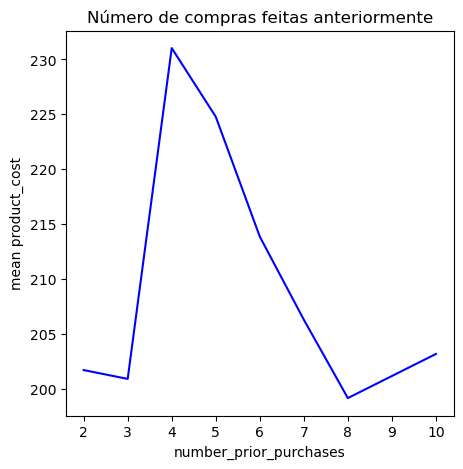

In [12]:
plt.figure(figsize =(5, 5))

a = sns.lineplot(y='product_cost', x='number_prior_purchases',data= data_2, color='blue') 
plt.title('Número de compras feitas anteriormente')
plt.xlabel("number_prior_purchases")
plt.ylabel("mean product_cost")

Clientes com 4 compras prévias é quando têm os custos superiores, baixando novamente, com tendência para subir a partir da 8ª compra prévia

In [13]:
X[['product_importance', 'product_cost']].groupby(['product_importance'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

,product_importance,product_cost
1,low,212.745348
2,medium,209.194005
0,high,203.958920


Os produtos de low importance são os que têm a média de custos mais elevada versus os high importance. 

In [14]:
X[['gender', 'product_cost']].groupby(['gender'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

,gender,product_cost
1,M,211.639557
0,F,209.246863


In [15]:
data_3 = X[['weekday_of_purchase', 'product_cost']].groupby(['weekday_of_purchase'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

In [16]:
data_3

,weekday_of_purchase,product_cost
3,5,213.000360
4,6,211.812882
0,2,211.754156
1,3,208.546889
2,4,204.713969


Text(0, 0.5, 'mean product_cost')

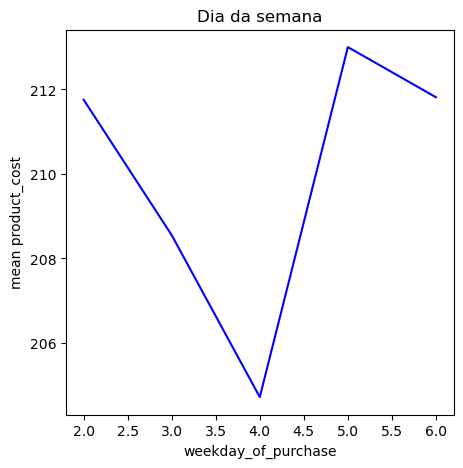

In [17]:
plt.figure(figsize =(5, 5))

a = sns.lineplot(y='product_cost', x='weekday_of_purchase',data= data_3, color='blue') 
plt.title('Dia da semana')
plt.xlabel("weekday_of_purchase")
plt.ylabel("mean product_cost")

Valores entre os 204 e 213, com a média de custos superior às quintas-feiras e inferior às quartas-feiras. 

In [18]:
data = X[['week_of_purchase', 'product_cost']].groupby(['week_of_purchase'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

In [19]:
data

,week_of_purchase,product_cost
25,26,232.006711
20,21,225.562500
22,23,225.126374
17,18,224.905314
23,24,222.208696
16,17,221.197802
18,19,218.177177
14,15,217.982955
12,13,217.735736
13,14,216.919463


Text(0, 0.5, 'mean product_cost')

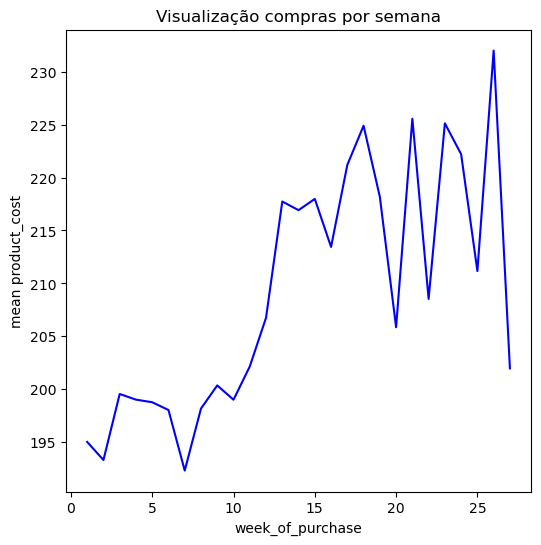

In [20]:
plt.figure(figsize =(6, 6))

a = sns.lineplot(y='product_cost', x='week_of_purchase',data= data, color='blue') 
plt.title('Visualização compras por semana')
plt.xlabel("week_of_purchase")
plt.ylabel("mean product_cost")

As médias dos custos das entregas nas semanas 1 a 8 (que não chegam a tempo) encontram-se entre as mais baixas, subindo a partir da 10ª semana. Vão existindo flutuações mas verifica-se uma grande quebra na semana 20 para 205€, voltando a subir na semana 21 para 221, depois volta a quebrar na semana 22 para 208€, voltando a subir na semana 23 para 225€ e voltando a descer consideravelmente na semana 25 para 211€, sobe na semana 26 para o máximo dos custos que é de 232€ e na última semana tem a maior quebra para 201€. 

In [21]:
X[['on_Time', 'product_cost']].groupby(['on_Time'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

,on_Time,product_cost
1,1,214.444244
0,0,207.740728


In [22]:
data_4 = X[['weight', 'product_cost']].groupby(['weight'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

Text(0, 0.5, 'mean product_cost')

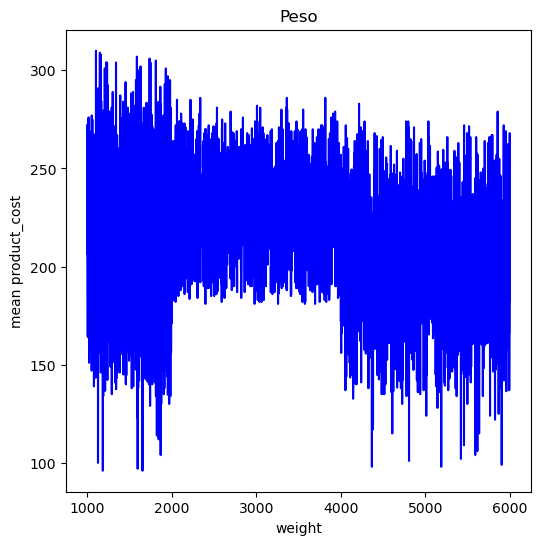

In [23]:
plt.figure(figsize =(6, 6))

a = sns.lineplot(y='product_cost', x='weight',data= data_4, color='blue') 
plt.title('Peso')
plt.xlabel("weight")
plt.ylabel("mean product_cost")

In [24]:
data_5 = X[['discount', 'product_cost']].groupby(['discount'], as_index=False).mean().sort_values(by='product_cost', ascending=False)

In [25]:
data_5

,discount,product_cost
8,9,218.036885
1,2,215.898013
9,10,215.494667
7,8,215.415014
2,3,215.241848
...,...,...
28,29,187.928571
19,20,187.250000
31,32,186.439024
57,58,186.045455


Text(0, 0.5, 'mean product_cost')

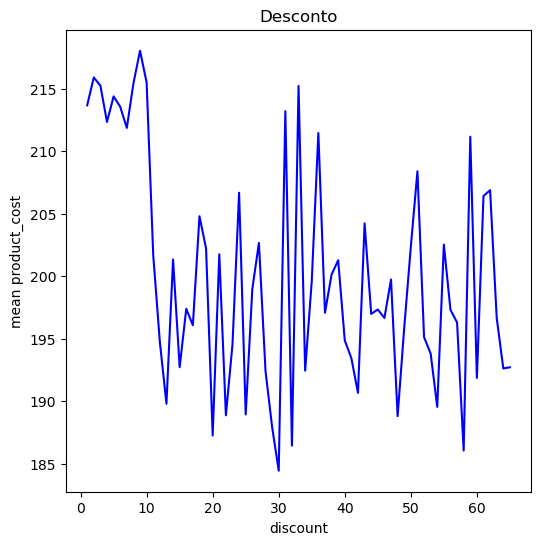

In [26]:
plt.figure(figsize =(6, 6))

a = sns.lineplot(y='product_cost', x='discount',data= data_5, color='blue') 
plt.title('Desconto')
plt.xlabel("discount")
plt.ylabel("mean product_cost")

## Encode categorical variables 

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   warehouse               9644 non-null   object
 1   shipment                9644 non-null   object
 2   number_customer_calls   9644 non-null   int64 
 3   customer_rating         9644 non-null   int64 
 4   product_cost            9644 non-null   int64 
 5   number_prior_purchases  9644 non-null   int64 
 6   product_importance      9644 non-null   object
 7   gender                  9644 non-null   object
 8   discount                9644 non-null   int64 
 9   weight                  9644 non-null   int64 
 10  weekday_of_purchase     9644 non-null   int64 
 11  week_of_purchase        9644 non-null   int64 
 12  on_Time                 9644 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 979.6+ KB


In [28]:
#feature warehouse - variáveis únicas 
X.loc[:, "warehouse"].unique()

array(['F', 'D', 'A', 'B', 'C'], dtype=object)

In [29]:
#encode categorical variables to numerical variables 
warehouse_map = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6}
X.loc[:, "warehouse"] = X.loc[:, "warehouse"].apply(lambda x: warehouse_map[x] )

In [30]:
#feature shipment - variáveis únicas 
X.loc[:, "shipment"].unique()

array(['Ship', 'Road', 'Flight'], dtype=object)

In [31]:
#encode categorical variables to numerical variables 
shipment_map = {"Ship": 1, "Road": 2, "Flight": 3}
X.loc[:, "shipment"] = X.loc[:, "shipment"].apply(lambda x: shipment_map[x] )

In [32]:
#product importance - variáveis únicas
X.loc[:, "product_importance"].unique()

array(['medium', 'high', 'low'], dtype=object)

In [33]:
#encode categorical variables to numerical variables 
produc_importance_map = {"low": 1, "medium": 2, "high": 3}
X.loc[:, "product_importance"] = X.loc[:, "product_importance"].apply(lambda x: produc_importance_map[x] )

In [34]:
#gender - variáveis únicas
X.loc[:, "gender"].unique()

array(['M', 'F'], dtype=object)

In [35]:
#encode categorical variables to numerical variables 
gender_map = {"M": 0, "F": 1}
X.loc[:, "gender"] = X.loc[:, "gender"].apply(lambda x: gender_map[x] )

In [36]:
#verificação
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   warehouse               9644 non-null   int64
 1   shipment                9644 non-null   int64
 2   number_customer_calls   9644 non-null   int64
 3   customer_rating         9644 non-null   int64
 4   product_cost            9644 non-null   int64
 5   number_prior_purchases  9644 non-null   int64
 6   product_importance      9644 non-null   int64
 7   gender                  9644 non-null   int64
 8   discount                9644 non-null   int64
 9   weight                  9644 non-null   int64
 10  weekday_of_purchase     9644 non-null   int64
 11  week_of_purchase        9644 non-null   int64
 12  on_Time                 9644 non-null   int64
dtypes: int64(13)
memory usage: 979.6 KB


In [37]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   warehouse               9644 non-null   int64
 1   shipment                9644 non-null   int64
 2   number_customer_calls   9644 non-null   int64
 3   customer_rating         9644 non-null   int64
 4   product_cost            9644 non-null   int64
 5   number_prior_purchases  9644 non-null   int64
 6   product_importance      9644 non-null   int64
 7   gender                  9644 non-null   int64
 8   discount                9644 non-null   int64
 9   weight                  9644 non-null   int64
 10  weekday_of_purchase     9644 non-null   int64
 11  week_of_purchase        9644 non-null   int64
 12  on_Time                 9644 non-null   int64
dtypes: int64(13)
memory usage: 979.6 KB


In [39]:
# convert categorical to integer
#Nomear as colunas do tipo category 
columns_int = [['warehouse'], ['shipment'], ['product_importance'], ['gender']]

In [40]:
#Replace Data Types to Integer
for column in columns_int: 
    X[column] = X[column].astype('int')

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   warehouse               9644 non-null   int32
 1   shipment                9644 non-null   int32
 2   number_customer_calls   9644 non-null   int64
 3   customer_rating         9644 non-null   int64
 4   product_cost            9644 non-null   int64
 5   number_prior_purchases  9644 non-null   int64
 6   product_importance      9644 non-null   int32
 7   gender                  9644 non-null   int32
 8   discount                9644 non-null   int64
 9   weight                  9644 non-null   int64
 10  weekday_of_purchase     9644 non-null   int64
 11  week_of_purchase        9644 non-null   int64
 12  on_Time                 9644 non-null   int64
dtypes: int32(4), int64(9)
memory usage: 828.9 KB


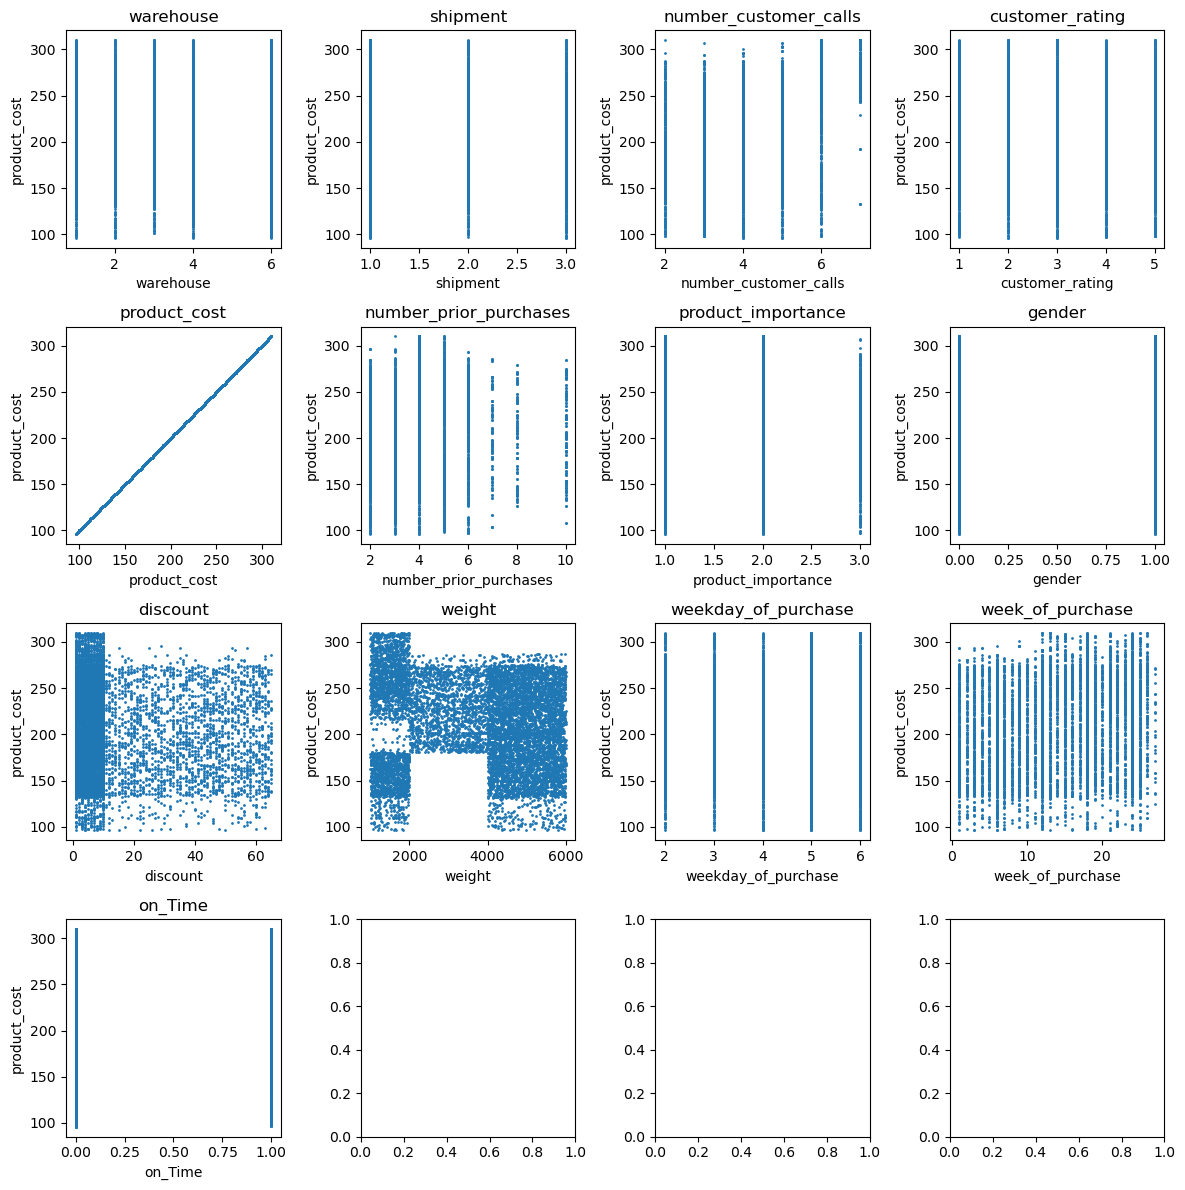

In [42]:
# Let's plot against the target label
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,4, figsize=(12,12),tight_layout=True)

for i, value in enumerate(X.columns):
    axs.flat[i].scatter(X[value], X["product_cost"], s=1)
    axs.flat[i].set_title(value)
    axs.flat[i].set_ylabel("product_cost")
    axs.flat[i].set_xlabel(value)


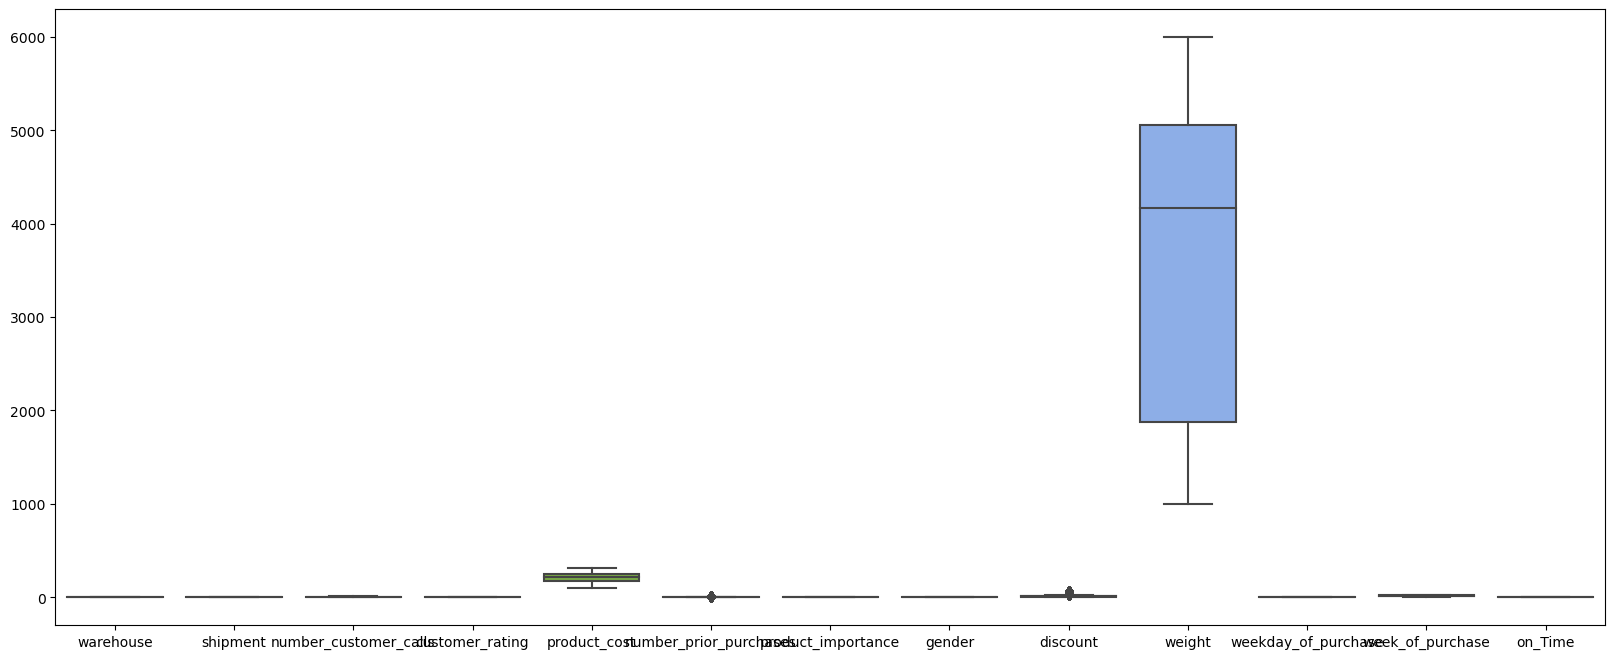

In [43]:
# looking for outliers using box plot
import seaborn as sns
plt.figure(figsize = (20, 8))
sns.boxplot(data = X, width = 0.8)
plt.show()

In [44]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


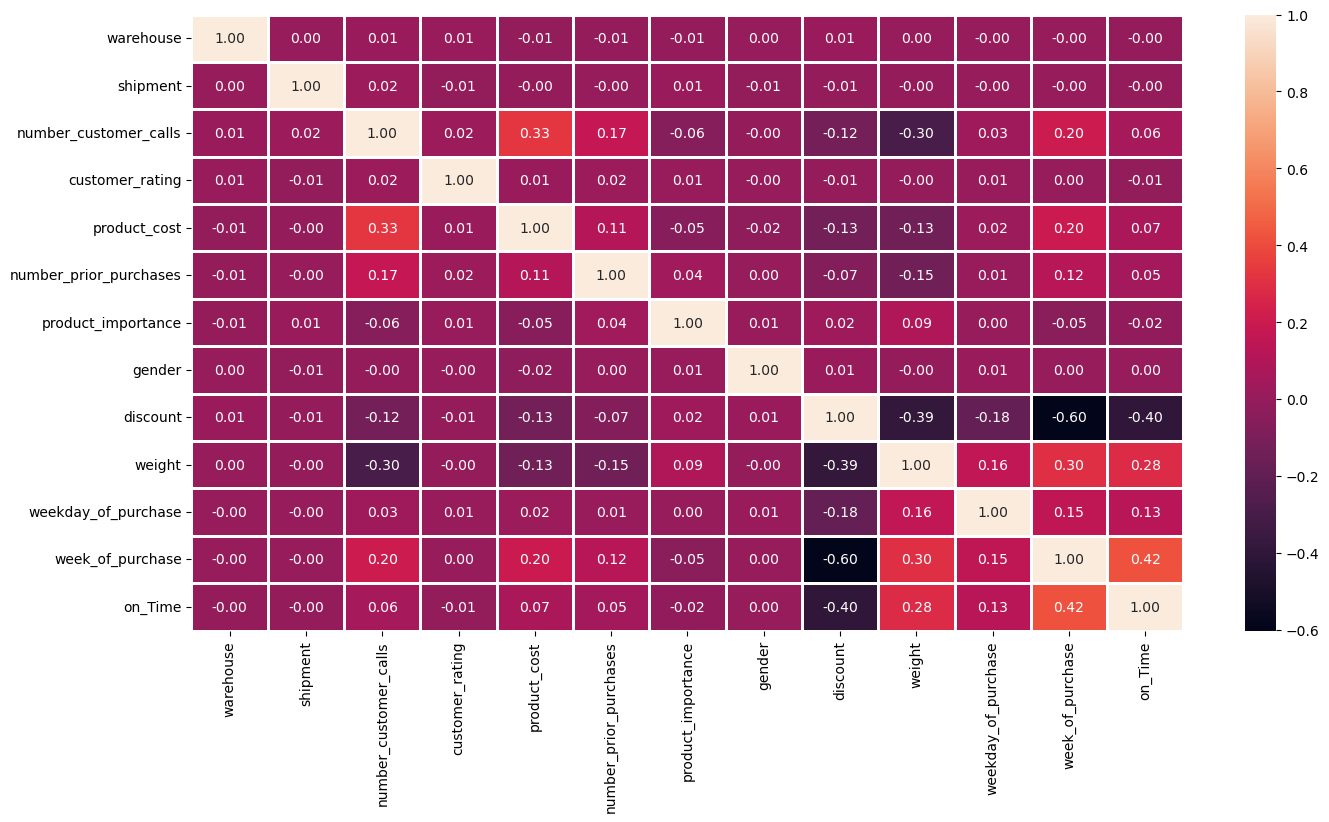

In [45]:
# Heatmap
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(X.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [46]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


Target feature

In [47]:
X['product_cost'].value_counts()

245    97
260    94
264    90
254    87
266    87
       ..
119     5
125     5
107     4
122     4
96      4
Name: product_cost, Length: 215, dtype: int64

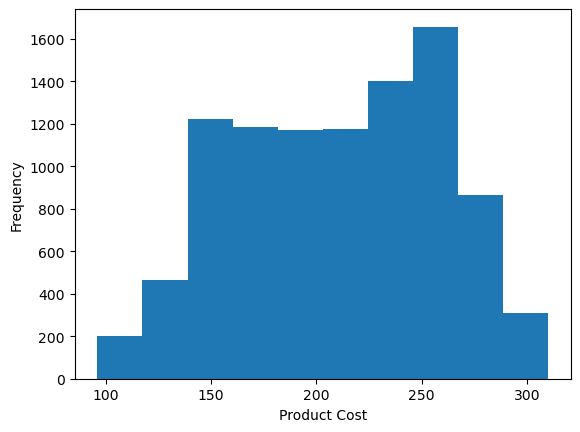

In [48]:
#product_cost histogram 

plt.hist(X["product_cost"])

plt.xlabel("Product Cost")
plt.ylabel("Frequency")
plt.show()


In [49]:
# For the outliers, lets apply a StandardScalar 
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()

## Feature Selection

In [50]:
#X = X[['number_customer_calls', 'product_cost', 'number_prior_purchases', 'discount', 'weight', 'week_of_purchase']]

In [51]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


## Split data into train and test

In [52]:
from sklearn.model_selection import train_test_split

Como queremos prever as vendas com base nas duas últimas semananas, o nosso teste vai ter como base as 2 últimas semanas, isto é as semanas 27 e 26. Então as vendas das 2 últimas semanas são os dados de teste e os restantes os dados de treino. 

In [53]:
X_test = X.loc[(X['week_of_purchase'] == 26) | ((X['week_of_purchase'] == 27))]

In [54]:
X_test

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
9469,4,1,3,4,248,3,2,0,7,5299,4,26,1
9470,6,1,4,3,244,3,1,0,9,5339,4,26,1
9471,1,1,4,1,197,3,3,0,9,4917,4,26,1
9472,2,2,5,5,268,4,1,1,9,4208,4,26,1
9473,3,2,5,5,203,4,1,0,6,4557,4,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


In [55]:
#verificação 
X_test['week_of_purchase'].value_counts()

26    149
27     26
Name: week_of_purchase, dtype: int64

In [56]:
X_train = X.loc[(X['week_of_purchase'] != 26) & (X['week_of_purchase'] != 27)]

In [57]:
X_train

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9464,6,1,5,3,201,6,1,1,3,4025,6,25,0
9465,1,1,4,3,213,4,2,0,8,4220,6,25,1
9466,2,1,2,3,269,2,1,0,3,5976,6,25,1
9467,3,1,6,5,217,4,1,1,2,4073,6,25,1


In [58]:
X_train['week_of_purchase'].value_counts()

12    1035
24    1035
6     1035
18    1035
3      352
21     352
9      352
15     352
1      333
19     333
13     333
7      333
25     333
10     233
16     233
22     233
4      233
11     182
17     182
5      182
23     182
2      149
14     149
8      149
20     149
Name: week_of_purchase, dtype: int64

In [59]:
# Let's seperate the dataset
y = X[['product_cost']]

y_train = X_train[["product_cost"]]
y_test = X_test[["product_cost"]]

In [60]:
#vamos também elinar a feature target 
X_train = X_train.drop(columns =['product_cost'])
X_test = X_test.drop(columns =['product_cost'])

In [61]:
y_train

,product_cost
0,234
1,122
2,135
3,103
4,257
...,...
9464,201
9465,213
9466,269
9467,217


In [62]:
y_test

,product_cost
9469,248
9470,244
9471,197
9472,268
9473,203
...,...
9639,204
9640,199
9641,216
9642,183


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [64]:
# !!!!!!! Perform normalization after split !!!!!!!!
X_train = scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)

In [65]:
#renomear as colunas para facilitar leitura 
X_train = pd.DataFrame(X_train).rename(columns={
    0: "warehouse",
    1: "shipment",
    2: "number_customer_calls",
    3: "customer_rating",
    4: "number_prior_purchases",
    5: "product_importance", 
    6: "gender",
    7: "discount",
    8: "weight",
    9: "weekday_of_purchase",
    10: "week_of_purchase",
    11: "on_Time"
})

In [66]:
#renomear as colunas para facilitar leitura 
X_test = pd.DataFrame(X_test).rename(columns={
    0: "warehouse",
    1: "shipment",
    2: "number_customer_calls",
    3: "customer_rating",
    4: "number_prior_purchases",
    5: "product_importance", 
    6: "gender",
    7: "discount",
    8: "weight",
    9: "weekday_of_purchase",
    10: "week_of_purchase",
    11: "on_Time"
})

In [67]:
#Let's just confirm that  the data is normaly distributed - mean 0 and std 1
pd.DataFrame(X_train).describe()

,warehouse,shipment,number_customer_calls,customer_rating,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
count,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03,9.469000e+03
mean,-2.302754e-17,-8.888585e-16,-1.102782e-14,-2.926684e-16,-2.760022e-16,1.374688e-15,-3.102387e-17,8.319884e-15,-9.201168e-16,-5.959537e-15,-4.951076e-14,-4.489386e-14
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.414305e+00,-6.368714e-01,-1.796529e+00,-1.409422e+00,-1.006977e+00,-9.459496e-01,-1.006463e+00,-7.677765e-01,-1.645193e+00,-1.868326e+00,-1.766188e+00,-8.129801e-01
25%,-8.839894e-01,-6.368714e-01,-9.262058e-01,-7.014587e-01,-3.542925e-01,-9.459496e-01,-1.006463e+00,-5.839504e-01,-1.101767e+00,-3.734442e-01,-9.302372e-01,-8.129801e-01
50%,1.766411e-01,-6.368714e-01,-5.588301e-02,6.504680e-03,-3.542925e-01,6.056175e-01,9.935785e-01,-4.001244e-01,3.117567e-01,3.739967e-01,-9.428617e-02,-8.129801e-01
75%,1.237271e+00,6.873568e-01,8.144398e-01,7.144680e-01,2.983915e-01,6.056175e-01,9.935785e-01,-2.162983e-01,8.625926e-01,1.121438e+00,7.416649e-01,1.230042e+00
max,1.237271e+00,2.011585e+00,2.555085e+00,1.422431e+00,4.214496e+00,2.157185e+00,9.935785e-01,3.153846e+00,1.441835e+00,1.121438e+00,1.577616e+00,1.230042e+00


### Feature Selection: Técnica Select from Model - Lasso 

In [68]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [69]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [70]:
#train Lasso Model and select features
sel_.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [71]:
#let's print the number of total and selected features
selected_feats = X_train.columns[(sel_.get_support())]

In [72]:
#let's print some stats
print ('Total variáveis: {}'.format((X_train.shape[1])))
print ('Variáveis selecionadas: {}'.format(len(selected_feats)))
print ('Variáveis com coeficiente zero {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

Total variáveis: 12
Variáveis selecionadas: 12
Variáveis com coeficiente zero 0


In [73]:
X_train = X_train[selected_feats]
X_test = X_test[selected_feats]
print(X_train.shape, X_test.shape)

(9469, 12) (175, 12)


Esta técnica não removeu nenhuma feature. 

### Select KBest

In [74]:
## Select K-Best
from sklearn.feature_selection import SelectKBest

## f_regression
from sklearn.feature_selection import f_regression

## Selecionar as três melhores features
Previsores_kbest = SelectKBest(f_regression, k=3).fit_transform(X_test, y_test)
print(Previsores_kbest)

[[-0.82263845 -1.18404978  0.99057945]
 [-0.82263845 -0.41944199  1.01357668]
 [-0.82263845 -0.41944199  0.77095589]
 [ 0.44018373  0.3451658   0.36332997]
 [ 0.44018373  0.3451658   0.56398081]
 [ 0.44018373 -0.41944199  0.71346282]
 [ 0.44018373 -1.18404978  1.35623543]
 [ 0.44018373  0.3451658   0.87501837]
 [ 0.44018373 -0.41944199  1.35853515]
 [ 0.44018373  0.3451658   0.55133234]
 [ 0.44018373 -1.94865757  1.01875106]
 [ 0.44018373 -0.41944199  0.58295353]
 [ 0.44018373  0.3451658   0.91468859]
 [ 0.44018373  0.3451658   0.5973268 ]
 [ 0.44018373 -1.18404978  0.73760991]
 [ 0.44018373  0.3451658   0.26501681]
 [ 0.44018373 -1.18404978  0.99057945]
 [ 0.44018373 -0.41944199  0.85949523]
 [ 0.44018373 -1.18404978  1.34186216]
 [ 0.44018373 -0.41944199  0.38517734]
 [ 0.44018373 -1.18404978  1.38268225]
 [ 0.44018373 -1.94865757  0.67321766]
 [ 0.44018373 -0.41944199  0.66286891]
 [ 0.44018373 -0.41944199  0.3190603 ]
 [ 0.44018373  1.1097736   0.58640311]
 [ 1.70300591 -0.41944199

C:\Users\olive\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Não sei interprestar isto. 

# Linear Regression 

In [75]:
from sklearn.linear_model import LinearRegression


In [76]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [77]:
# prediction of model
y_pred = lr.predict(X_test)

In [78]:
# test coeficiente de determinação (R²) 
lr.score(X_test, y_test)

0.0348467241629975

In [79]:
# erro quadrático médio (MSE) 
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, y_pred))

46.52251924392329

# DT Regression

In [80]:
from sklearn.tree import DecisionTreeRegressor
DT_reg = DecisionTreeRegressor()
DT_model = DT_reg.fit(X_train, y_train)

In [81]:
# prediction of model
y_pred = DT_model.predict(X_test)

In [82]:
# test accuracy of model
DT_model.score(X_test, y_test)

-0.7368182135878225

In [83]:
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, y_pred)) 

62.408286995512746

# SVR - Support Vector Regression

In [84]:
from sklearn.svm import SVR
SVR_reg = SVR()
SVR_model = SVR_reg.fit(X_train, y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
# prediction of model
y_pred = SVR_model.predict(X_test)

In [86]:
# test accuracy of model
SVR_model.score(X_test, y_test)

0.0829021448110503

In [87]:
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, y_pred))

45.349543380470976

Os melhores resultados: 

A pontuação de R² (ou coeficiente de determinação) do modelo SVR é 0.08, o que indica que o modelo explica cerca de 8% da variação total nos dados de teste o que é uma quantidade considerável de variância que não está a ser explicada pelo modelo.
O erro médio quadrático (MSE) é de 43. Este valor deve ser considerado em relação ao intervalo dos dados de resposta. Por exemplo, se o intervalo dos dados de resposta é [0, 100], então um erro médio absoluto de 43 seria relativamente grande, representando uma imprecisão significativa. No entanto, se o intervalo dos dados de resposta é [0, 1000000], então um erro médio absoluto de 43 seria relativamente pequeno.

# Lasso Regression

In [88]:
from sklearn.linear_model import Lasso, LassoCV

In [89]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)

In [90]:
lasso_model = lasso_cv.fit(X_train, y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [91]:
# best alpha parameter
alpha = lasso_cv.alpha_

In [92]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso_model = lasso.fit(X_train, y_train)

In [93]:
lasso.score(X_test, y_test)

0.03471655160995113

In [94]:
# prediction of model
y_pred = lasso_model.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred))

46.52565644040502

# Ridge Regression

In [95]:
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_model = ridge_cv.fit(X_train, y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [96]:
ridge_model.score(X_test, y_test)

0.017761598921863353

In [97]:
# prediction of model
y_pred = ridge_model.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred))

46.93248329166443

# ElasticNet

In [98]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_model = elastic_net_cv.fit(X_train, y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\olive\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to o

In [99]:
# l1 ratio 
elastic_net_cv.l1_ratio

0.5

In [100]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_model = elastic_net.fit(X_train, y_train)

In [101]:
elastic_model.score(X_test, y_test)

0.034839170131565234

In [102]:
# prediction of model
y_pred = elastic_model.predict(X_test)
sqrt(mean_squared_error(y_test, y_pred))

46.52270130406536

# Conclusões

1. Foi construído modelo para previsão de custos, utilizando como target feature "product_cost". Uma vez que é solicitado que seja com base nas duas últimas semanas, usei como dados de teste, os dados das semanas 26 e 27 (as 2 últimas). Resultaram somente 175 linhas para teste, talvez seja um dos motivos dos fracos resultados que serão de seguida comentados. 
2. Foram utilizados vários algoritmos de supervided learning para variáveis contínuas: 
    Linear Regression; 
    Decision Treee Regression;
    SVR - Support Vector Regression;
    Lasso Regression;
    Ridge Regression;
    ElasticNet. 
3. Todas as features têm fraca correlação com a target feature pelo que utilizei um método de feature selection - Select from Model - Lasso com todas as features selecionadas. 
4. Todos os algoritmos forneceram resultados muito insatisfatórios, sendo que o melhor foi o do SVR com uma pontuação de R²( coeficiente de determinação) do modelo de 0.08, o que indica que somente explica cerca de 8% da variação total nos dados de teste o que é uma quantidade considerável de variância que não está a ser explicada pelo modelo. Já o erro médio quadrático (MSE) é de 43. Como o intervalo dos dados é relativamente pequeno, concluo que é um erro relativamente grande. 
5. Assim concluo que com os dados fornecidos não é possivel criar um modelo satisfatorio que preveja os custos com base nas 2 últimas semanas. 
    